In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [98]:
data = pd.read_csv ('study1_all - REPEATS.csv')
data

,Number\n,Age\n(Years),Height \n(m),Weight\n(kg),BMI\n(kg/m^2),Waist circumference \n(cm),Systolic Blood Pressure at rest (mmHg),Diastolic Blood Pressure at rest (mmHg),Heart rate at rest\n(bpm),Body fat %,...,VT1 RER,VT2 FATox,VT2 CHOox,VT2 RER,VO2MAX \nFATox,VO2MAX\nCHOox,VO2MAX\nRER,PFO \n(g/min),PCHOox \n(g/min),PEAK\nRER
0,1.0,24.0,1.90,76.1,21.00,82.0,160.0,82.0,55.0,12.8,...,NaN,0.00,3.94,1.02,0.00,3.06,1.16,0.95,5.59,1.19
1,5.0,28.0,1.75,68.8,22.00,80.0,126.0,75.0,66.0,13.7,...,NaN,0.00,2.82,1.10,0.00,1.39,1.27,0.48,3.41,1.30
2,7.0,24.0,1.73,81.0,27.00,83.0,131.0,71.0,74.0,11.4,...,NaN,0.00,3.00,1.00,0.00,2.00,1.20,0.70,5.00,1.30
3,8.0,23.0,1.82,77.8,24.00,82.0,139.0,78.0,56.0,17.4,...,NaN,0.00,2.94,1.06,0.00,2.68,1.14,0.54,4.75,1.18
4,9.0,24.0,1.75,72.7,23.60,63.0,119.0,63.0,71.0,18.1,...,NaN,0.00,1.57,1.19,0.00,0.58,1.35,0.36,2.63,1.45
5,10.0,24.0,1.66,77.5,28.00,93.0,133.0,83.0,69.0,27.8,...,0.93,0.07,3.37,0.98,0.00,2.74,1.14,0.58,4.00,1.25
6,15.0,24.0,1.85,87.6,25.71,90.0,114.0,60.0,49.0,20.7,...,0.81,0.90,7.90,0.88,0.00,6.00,1.06,2.18,11.72,1.09
7,1001.0,25.0,1.78,65.0,20.52,73.0,121.0,82.0,37.0,7.6,...,0.79,0.05,3.48,0.99,0.05,2.02,1.24,0.91,4.86,1.30
8,1015.0,20.0,1.82,66.5,20.08,72.0,113.0,75.0,55.0,17.6,...,0.76,0.00,2.07,1.10,0.05,3.91,0.99,0.57,4.56,1.35
9,1018.0,18.0,1.82,87.5,26.42,85.0,111.0,83.0,59.0,20.5,...,0.87,0.05,3.78,0.99,0.00,2.89,1.17,0.81,6.16,1.25


In [99]:
data.columns

Index(['Number\n', 'Age\n(Years)', 'Height \n(m)', 'Weight\n(kg)',
       'BMI\n(kg/m^2)', 'Waist circumference \n(cm)',
       'Systolic Blood Pressure at rest (mmHg)',
       'Diastolic Blood Pressure at rest (mmHg)', 'Heart rate at rest\n(bpm)',
       'Body fat %', 'Skeletal muscle mass\n(kg)',
       'Skeletal Muscle Mass Index\n(kg/m^2)', 'Visceral fat\n(Litres) ',
       'Resting metabolic rate (kcal/day)', 'RQ', '%  Fat', '% Carbohydrate',
       'Hand grip strength - dominant\n(kg)',
       'Normative Percentiles \n(Wang et al., 2019)',
       'Hand grip strength - non-dominant\n(kg)',
       'Hand grip strength -  Combined Score\n(kg)',
       'Normative Percentiles (Hoffmann et al., 2019)', 'Back strength\n(kg)',
       'Back strength/kg', 'Absolute\nVO2 max\n(L/min)',
       'Relative\nVO2 max\n(mL/kg/min)', 'VO2 max/\nSMM\n(mL/kg/min)',
       'Max Aerobic\nPower \n(Watts)', 'MAP/BW (W/kg)', 'MAP/SMM (W/kg)',
       'Normative Percentiles\n(Kaminsky et al., 2017)',
       

In [100]:
data1 = data.copy()
data1 = data[['Absolute\nVO2 max\n(L/min)',
       'Relative\nVO2 max\n(mL/kg/min)', 'VO2 max/\nSMM\n(mL/kg/min)',
       'Max Aerobic\nPower \n(Watts)', 'MAP/BW (W/kg)', 'MAP/SMM (W/kg)',
       'Normative Percentiles\n(Kaminsky et al., 2017)',
       'Ventilatory threshold 2\n(mL/kg/min)', 'VT2/SMM\n(mL/kg/min)', 'Functional Threshold Power\n(Watts)',
       'FTP/BW\n(W/kg)', 'FTP/SMM\n(W/kg)','PFO \n(g/min)', 'PCHOox \n(g/min)']]
data1

,Absolute\nVO2 max\n(L/min),Relative\nVO2 max\n(mL/kg/min),VO2 max/\nSMM\n(mL/kg/min),Max Aerobic\nPower \n(Watts),MAP/BW (W/kg),MAP/SMM (W/kg),"Normative Percentiles\n(Kaminsky et al., 2017)",Ventilatory threshold 2\n(mL/kg/min),VT2/SMM\n(mL/kg/min),Functional Threshold Power\n(Watts),FTP/BW\n(W/kg),FTP/SMM\n(W/kg),PFO \n(g/min),PCHOox \n(g/min)
0,3.65,48.00,108.07,280.0,3.68,8.28,70.0,41.0,92.31,221.0,2.90,6.54,0.95,5.59
1,2.89,42.00,96.00,210.0,3.05,6.98,50.0,41.0,93.71,185.0,2.69,6.15,0.48,3.41
2,4.13,51.00,114.43,300.0,3.70,8.31,75.0,42.0,94.24,255.0,3.15,7.06,0.70,5.00
3,3.03,39.00,90.04,230.0,2.96,6.82,40.0,31.0,71.57,170.0,2.19,5.04,0.54,4.75
4,2.76,38.00,89.12,210.0,2.89,6.77,35.0,29.0,68.01,156.0,2.15,5.03,0.36,2.63
5,3.02,39.00,106.43,215.0,2.77,7.57,40.0,31.0,84.60,166.0,2.14,5.85,0.58,4.00
6,5.17,59.00,149.81,420.0,4.79,12.17,95.0,53.0,134.57,339.0,3.87,9.83,2.18,11.72
7,3.58,55.08,124.74,290.0,4.46,10.10,85.0,39.0,88.33,250.0,3.85,8.71,0.91,4.86
8,2.86,43.01,107.52,200.0,3.01,7.52,55.0,29.0,72.50,150.0,2.26,5.64,0.57,4.56
9,3.67,41.94,103.38,240.0,2.74,6.76,50.0,33.0,81.34,190.0,2.17,5.35,0.81,6.16


In [101]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data1)
data_scaled = pd.DataFrame(data_scaled[:,:], columns=data1.columns)
data_scaled

,Absolute\nVO2 max\n(L/min),Relative\nVO2 max\n(mL/kg/min),VO2 max/\nSMM\n(mL/kg/min),Max Aerobic\nPower \n(Watts),MAP/BW (W/kg),MAP/SMM (W/kg),"Normative Percentiles\n(Kaminsky et al., 2017)",Ventilatory threshold 2\n(mL/kg/min),VT2/SMM\n(mL/kg/min),Functional Threshold Power\n(Watts),FTP/BW\n(W/kg),FTP/SMM\n(W/kg),PFO \n(g/min),PCHOox \n(g/min)
0,0.531209,0.834977,0.245363,0.748565,0.976373,0.461633,0.868006,1.041832,0.581699,0.655009,0.774218,0.365424,0.725811,0.390034
1,-0.657448,-0.071492,-0.586360,-0.718622,-0.172608,-0.638789,-0.144668,1.041832,0.674264,-0.169272,0.386119,0.041788,-0.664534,-0.908802
2,1.281939,1.288212,0.683619,1.167762,1.012848,0.487027,1.121174,1.189910,0.709307,1.433498,1.236241,0.796938,-0.013734,0.038514
3,-0.438485,-0.524727,-0.997054,-0.299426,-0.336748,-0.774225,-0.651004,-0.438945,-0.789593,-0.512723,-0.537926,-0.879328,-0.487043,-0.110435
4,-0.860770,-0.675805,-1.060449,-0.718622,-0.464412,-0.816549,-0.904172,-0.735100,-1.024974,-0.833277,-0.611850,-0.887627,-1.019516,-1.373522
5,-0.454125,-0.524727,0.132353,-0.613823,-0.683266,-0.139367,-0.651004,-0.438945,0.071927,-0.604310,-0.630331,-0.207162,-0.368716,-0.557282
6,2.908521,2.496838,3.121595,3.682940,3.000767,3.754432,2.133847,2.818765,3.375854,3.356821,2.566866,3.095580,4.364372,4.042262
7,0.421727,1.904611,1.394064,0.958163,2.398920,2.002223,1.627510,0.745677,0.318548,1.319014,2.529904,2.166165,0.607483,-0.044897
8,-0.704368,0.081097,0.207463,-0.928221,-0.245559,-0.181690,0.108501,-0.735100,-0.728103,-0.970657,-0.408560,-0.381428,-0.398298,-0.223636
9,0.562489,-0.080557,-0.077817,-0.089828,-0.737979,-0.825014,-0.144668,-0.142789,-0.143618,-0.054789,-0.574888,-0.622080,0.311665,0.729637


In [102]:
wcss =[]

for i in range(1,12):
    kmeans = KMeans(i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

wcss1 = pd.DataFrame(wcss)
wcss1.to_csv('All Subjects Fitness WCSS.csv')
wcss

[391.99999999999994,
 203.39365250735844,
 118.7693300971376,
 86.34077761723519,
 70.23908478906338,
 59.33191179085689,
 52.49767311311284,
 43.80448252623847,
 41.27008456376698,
 35.31529169085938,
 29.44725637070612]

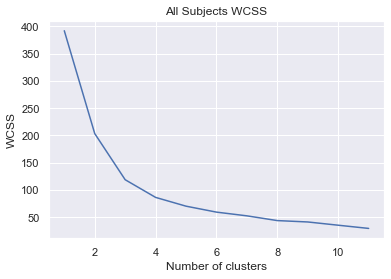

In [103]:
plt.plot(range(1,12),wcss)
plt.title('All Subjects WCSS')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('All Subjetcs WCSS.jpg')

In [104]:
data_scaled_2 = data_scaled.copy()
data_scaled_3 = data_scaled.copy()

In [105]:
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto")
data_scaled['clusters'] = clustering_kmeans.fit_predict(data_scaled)
data_scaled['clusters']

C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


0     1
1     0
2     1
3     3
4     3
5     0
6     2
7     1
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    1
16    3
17    1
18    0
19    3
20    3
21    3
22    1
23    3
24    0
25    1
26    0
27    0
Name: clusters, dtype: int32

In [106]:
data_scaled['clusters'].to_csv('All Subjects (Repeats) Aerobic Fitness Clusters.csv')

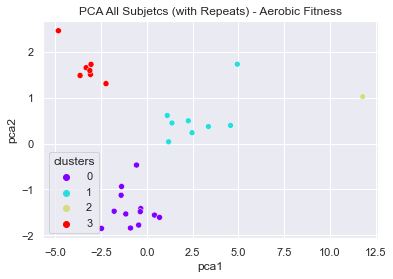

In [107]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data_scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results.to_csv('All Subjects (REPEATS) Aerobic Fitness PCAs.csv')

sns.scatterplot(x="pca1", y="pca2", palette=('rainbow'), hue=data_scaled['clusters'], data=results)
plt.title('PCA All Subjetcs (with Repeats) - Aerobic Fitness')
plt.savefig('All Subjetcs (REPEATS) - Aerobic Fitness PCA.jpg')
plt.show()

In [108]:
kmeans_new = KMeans(4)
kmeans_new.fit(data_scaled_2)
clusters_new = data.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(data_scaled_2)

In [109]:
clusters_new

,Number\n,Age\n(Years),Height \n(m),Weight\n(kg),BMI\n(kg/m^2),Waist circumference \n(cm),Systolic Blood Pressure at rest (mmHg),Diastolic Blood Pressure at rest (mmHg),Heart rate at rest\n(bpm),Body fat %,...,VT2 FATox,VT2 CHOox,VT2 RER,VO2MAX \nFATox,VO2MAX\nCHOox,VO2MAX\nRER,PFO \n(g/min),PCHOox \n(g/min),PEAK\nRER,cluster_pred
0,1.0,24.0,1.90,76.1,21.00,82.0,160.0,82.0,55.0,12.8,...,0.00,3.94,1.02,0.00,3.06,1.16,0.95,5.59,1.19,0
1,5.0,28.0,1.75,68.8,22.00,80.0,126.0,75.0,66.0,13.7,...,0.00,2.82,1.10,0.00,1.39,1.27,0.48,3.41,1.30,3
2,7.0,24.0,1.73,81.0,27.00,83.0,131.0,71.0,74.0,11.4,...,0.00,3.00,1.00,0.00,2.00,1.20,0.70,5.00,1.30,0
3,8.0,23.0,1.82,77.8,24.00,82.0,139.0,78.0,56.0,17.4,...,0.00,2.94,1.06,0.00,2.68,1.14,0.54,4.75,1.18,1
4,9.0,24.0,1.75,72.7,23.60,63.0,119.0,63.0,71.0,18.1,...,0.00,1.57,1.19,0.00,0.58,1.35,0.36,2.63,1.45,1
5,10.0,24.0,1.66,77.5,28.00,93.0,133.0,83.0,69.0,27.8,...,0.07,3.37,0.98,0.00,2.74,1.14,0.58,4.00,1.25,1
6,15.0,24.0,1.85,87.6,25.71,90.0,114.0,60.0,49.0,20.7,...,0.90,7.90,0.88,0.00,6.00,1.06,2.18,11.72,1.09,2
7,1001.0,25.0,1.78,65.0,20.52,73.0,121.0,82.0,37.0,7.6,...,0.05,3.48,0.99,0.05,2.02,1.24,0.91,4.86,1.30,0
8,1015.0,20.0,1.82,66.5,20.08,72.0,113.0,75.0,55.0,17.6,...,0.00,2.07,1.10,0.05,3.91,0.99,0.57,4.56,1.35,1
9,1018.0,18.0,1.82,87.5,26.42,85.0,111.0,83.0,59.0,20.5,...,0.05,3.78,0.99,0.00,2.89,1.17,0.81,6.16,1.25,3


In [110]:
clusters_new.to_csv('All Subjects (REPEATS) K-Means by VO2max & VT2 (4 clusters).csv')

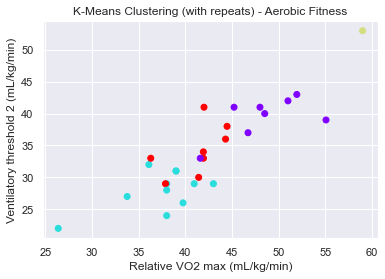

In [111]:
plt.scatter(clusters_new['Relative\nVO2 max\n(mL/kg/min)'],clusters_new['Ventilatory threshold 2\n(mL/kg/min)'], c=clusters_new['cluster_pred'],cmap='rainbow')
plt.title('K-Means Clustering (with repeats) - Aerobic Fitness')
plt.xlabel('Relative VO2 max (mL/kg/min)')
plt.ylabel('Ventilatory threshold 2 (mL/kg/min)')
#add legend with class names
plt.savefig('All Subjetcs K-Means (repeats) by VO2max & VT2 (4c).jpg')
plt.show()

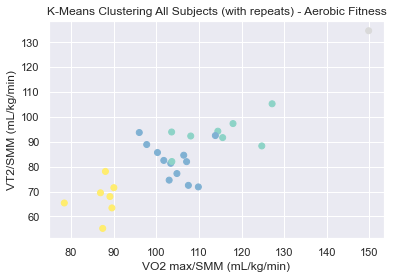

In [112]:
kmeans_new = KMeans(4)
kmeans_new.fit(data_scaled_3)
clusters_new_1 = data.copy()
clusters_new_1['cluster_pred'] = kmeans_new.fit_predict(data_scaled_3)

clusters_new_1.to_csv('All Subjetcs K-Means (REPEATS) by VO2max & VT2 relative to SMM (4 clusters).csv')

plt.scatter(clusters_new_1['VO2 max/\nSMM\n(mL/kg/min)'],clusters_new_1['VT2/SMM\n(mL/kg/min)'],c=clusters_new_1['cluster_pred'],cmap='Set3')
plt.title('K-Means Clustering All Subjects (with repeats) - Aerobic Fitness')
plt.xlabel('VO2 max/SMM (mL/kg/min)')
plt.ylabel('VT2/SMM (mL/kg/min)')
plt.savefig('All Subjetcs K-Means (REPEATS) by VO2max & VT2 relative to SMM (4c).jpg')
plt.show()
